In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [3]:
samples=penguins_df.iloc[:,:4]
samples

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
327,47.2,13.7,214.0,4925.0
328,46.8,14.3,215.0,4850.0
329,50.4,15.7,222.0,5750.0
330,45.2,14.8,212.0,5200.0


In [4]:
scaler=StandardScaler()
scaler.fit(samples)
sample_scaled=scaler.transform(samples)

C:\Users\kdpco\OneDrive\Documents\docs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kdpco\OneDrive\Documents\docs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kdpco\OneDrive\Documents\docs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kdpco\OneDrive\Documents\docs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

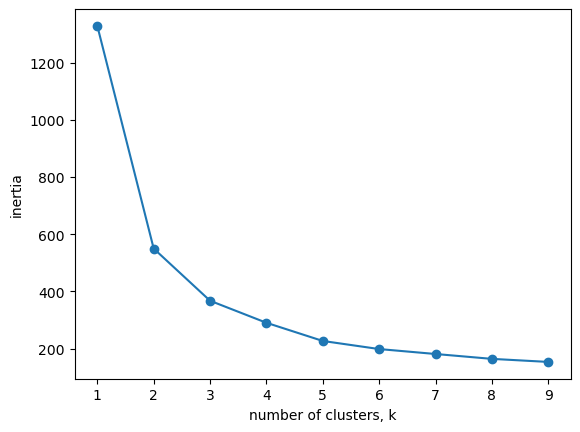

In [5]:
ks = range(1, 10) 
inertias = [] 
for k in ks: 
    # Create a KMeans instance with k clusters: 
    model=KMeans (n_clusters=k)  
    model.fit(sample_scaled) 
    # Append the inertia to the list of inertias 
    inertias.append(model.inertia_) 
    # Plot ks vs inertias 
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()

In [6]:
model_optimal = KMeans(n_clusters=3)
model_optimal.fit(sample_scaled)
labels=model_optimal.predict(sample_scaled)
mean = model_optimal.cluster_centers_


C:\Users\kdpco\OneDrive\Documents\docs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kdpco\OneDrive\Documents\docs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [7]:
df_numeric=penguins_df.iloc[:,:4]
df_numeric['cluster']=labels
stat_penguins = df_numeric.groupby("cluster").mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,38.305469,18.098437,188.554688,3587.500000
1,47.568067,14.996639,217.235294,5092.436975
2,47.662353,18.748235,196.917647,3898.235294
